# **Task: Table Booking and Online Delivery**

# *Determine the percentage of restaurants that offer table booking and online delivery*

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv(r'C:\Users\kuldeep singh\OneDrive\Desktop\Cognifyz-Technologies\dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [49]:
total_restaurants = len(df)
total_restaurants

9551

In [50]:
table_booking = df[df['Has Table booking'] == 'Yes']
table_booking

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,6800569,Chaophraya,215,Manchester,"19 Chapel Walks, City Center, Market Street, M...",Market Street,"Market Street, Manchester",-2.243505,53.481740,Thai,...,Pounds(��),Yes,No,No,No,4,4.3,Green,Very Good,422
9415,6801873,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-2.245034,53.477358,"European, Mediterranean, Contemporary",...,Pounds(��),Yes,No,No,No,3,4.2,Green,Very Good,67
9431,18295472,Gymkhana,166,Doha,"Ground Floor, Al Jomrok Boutique Hotel, Souq W...",Souq Waqif,"Souq Waqif, Doha",51.533316,25.289411,Indian,...,Qatari Rial(QR),Yes,No,No,No,4,4.7,Dark Green,Excellent,114
9450,6400621,Nobu - One&Only,189,Cape Town,"One & Only Hotel, Dock Road, V & A Waterfront,...","One and Only Hotel, V & A Waterfront","One and Only Hotel, V & A Waterfront, Cape Town",18.416435,-33.908603,"Japanese, Asian, Seafood, Sushi",...,Rand(R),Yes,No,No,No,4,4.0,Green,Very Good,110


In [51]:
table_booking_percentage = (len(table_booking) / total_restaurants) * 100
table_booking_percentage

12.124384881164275

In [52]:
online_delivery = df[df['Has Online delivery'] == 'Yes']
online_delivery

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
565,5704255,Famous Dave's Barbecue,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382946,24.495693,American,...,Emirati Diram(AED),No,Yes,No,No,4,4.6,Dark Green,Excellent,376
566,5701978,Pizza Di Rocco,214,Abu Dhabi,Near Corner of Salam and Al Falah Street (9th ...,Al Dhafrah,"Al Dhafrah, Abu Dhabi",54.381931,24.485579,"Italian, Pizza",...,Emirati Diram(AED),Yes,Yes,No,No,3,4.4,Green,Very Good,471
571,5700052,Cho Gao - Crowne Plaza Abu Dhabi,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...","Crowne Plaza Abu Dhabi, Al Markaziya","Crowne Plaza Abu Dhabi, Al Markaziya, Abu Dhabi",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",...,Emirati Diram(AED),Yes,Yes,No,No,4,4.4,Green,Very Good,246
572,5702418,Gazebo,214,Abu Dhabi,"Ground Level, Next to E-Max, Dalma Mall, Mussa...","Dalma Mall, Mussafah Sanaiya","Dalma Mall, Mussafah Sanaiya, Abu Dhabi",54.524122,24.334217,"Indian, North Indian, Mughlai, Biryani",...,Emirati Diram(AED),Yes,Yes,No,No,3,4.0,Green,Very Good,355
573,5700386,Sangeetha Vegetarian Restaurant,214,Abu Dhabi,"Opposite Cristal Hotel, Behind KM Trading, Ele...",Madinat Zayed,"Madinat Zayed, Abu Dhabi",54.363776,24.485253,"Indian, South Indian",...,Emirati Diram(AED),No,Yes,No,No,2,3.6,Yellow,Good,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,11371,Chili's,1,Pune,"UG 49, Phoenix Market City, Nagar Road, Viman ...","Phoenix Market City, Viman Nagar","Phoenix Market City, Viman Nagar, Pune",73.916619,18.562450,"Mexican, American, Tex-Mex",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.5,Dark Green,Excellent,1439
9168,18292672,Blue Water,1,Pune,"Punawale, Near Basket Bridge,Off Aundh-Ravet B...",Ravet,"Ravet, Pune",73.751081,18.636215,"North Indian, Chinese, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.2,Green,Very Good,487
9170,6507967,Tales & Spirits,1,Pune,"Plot 64, Shivaji Housing Society, Senapati Bap...",Senapati Bapat Road,"Senapati Bapat Road, Pune",73.828972,18.530963,"Italian, Continental, Cafe",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.1,Green,Very Good,997
9171,6506206,18 Degrees Resto Lounge,1,Pune,"8th & 9th Floor, Spot 18 Mall, Pimple Saudagar...","Spot 18 Mall, Pimple Saudagar","Spot 18 Mall, Pimple Saudagar, Pune",73.785901,18.593481,"North Indian, Mediterranean, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,3.6,Yellow,Good,1566


In [53]:
online_delivery_percentage = (len(online_delivery) / total_restaurants) * 100
online_delivery_percentage

25.662234321013504

#*Compare the average ratings of restaurantswith table booking and those without.*

In [54]:
df['Has Table booking'] = df['Has Table booking'].str.lower().map({'yes': True, 'no': False})

In [55]:
df = df.dropna(subset=['Aggregate rating'])

In [56]:
average_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()
average_ratings

Has Table booking
False    2.559359
True     3.441969
Name: Aggregate rating, dtype: float64

# *Analyze the availability of online deliveryamong restaurants with different price ranges*

In [57]:
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [58]:
df['Has Online delivery'] = df['Has Online delivery'].str.lower().map({'yes': True, 'no': False})
delivery_stats = df.groupby('Price range')['Has Online delivery'].mean() * 100
delivery_stats

Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64

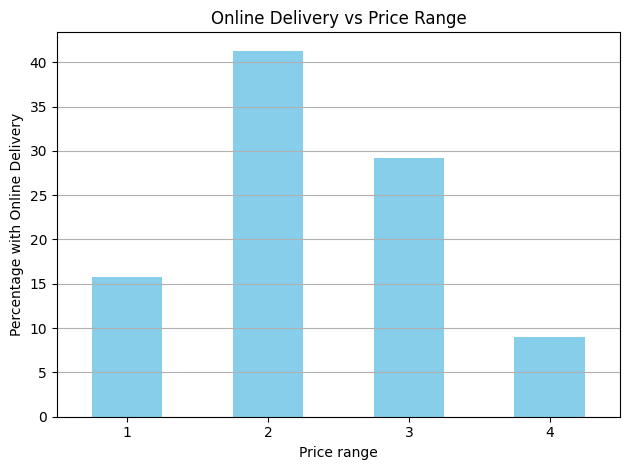

In [59]:
delivery_stats.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage with Online Delivery')
plt.title('Online Delivery vs Price Range')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()